## Rhyming Generation

In [1]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

from numpy import array
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
import string

Using TensorFlow backend.


In [2]:
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
# load text
raw_text = load_doc('data/shakespeare_copy.txt')
# clean
raw_text = ''.join([i for i in raw_text if not i.isdigit()])
split_on_punct = list(filter(lambda name: name.strip(), raw_text.split('\n'))) 

In [3]:
end_words = []
exclude = set(string.punctuation)
for element in split_on_punct:
    tokens = element.split()
    s = ''.join(ch for ch in tokens[-1] if ch not in exclude)
    end_words.append(s)

In [4]:
rhyming = []
for index in range(0, len(end_words), 14):
    rhyming.append((end_words[index], end_words[index + 2]))
    rhyming.append((end_words[index + 1], end_words[index + 3]))
    rhyming.append((end_words[index + 4], end_words[index + 6]))
    rhyming.append((end_words[index + 5], end_words[index + 7]))
    rhyming.append((end_words[index + 8], end_words[index + 10]))
    rhyming.append((end_words[index + 9], end_words[index + 11]))
    rhyming.append((end_words[index + 12], end_words[index + 13]))

In [5]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

In [6]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare_copy.txt')).read()
text_cleaned = ''.join([i for i in text if not i.isdigit()])

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [7]:
obs, obs_map = parse_observations(text_cleaned)

In [8]:
hmm8 = unsupervised_HMM(obs, 30, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

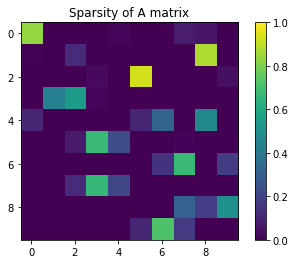

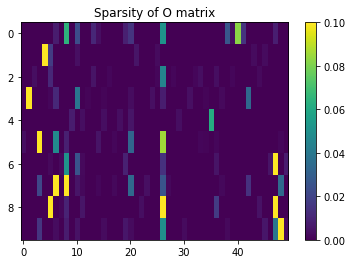

In [4]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [9]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=9, rhyming_dict = rhyming))

Sample Sentence:
In where nor make vices i tomorrow what eyed
Each perhaps under eyes me art not most rest
Eternal thou of freedom bring in him master pride
In thy thy one youth the ground to oppressed
Spirit on therein where days a it thou thee
This my of out sweet in now out born
From off should thou yet eye the belied be
Name sum the before shape said how this forsworn
Some or beloved amazeth thy that you and me
Bear deaf white thy of shadow i fortune you
Decay pupil brow art gives shall can beauty be
Bow curious so soul and woe ransom have true
Eyes dote seest self to she with i time
Runs or that sweets with removed by ornament crime



In [21]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=8, rhyming_dict = rhyming))

Sample Sentence:
Youthful strength steel thy of alchemy a true
Who record and their lives fire bounty power
To glass departest nothing now lords growst new
Defeat mind his methinks perforce me well bower
Your of bodys last self unworthiness they break
And slain brought more unkind sees silence near
Taught beloved me it think when beated speak
New thee excuse tyrants but poet with there
The than dear my health which two young
Came thoughts your call wilt perfection hope costs
Of clouds and place the the as tongue
To son the the so not for boast
Despised greater but yours that think the accumulate
Alone disgrace my prove bitter their is hate

